In [1]:
import sys
sys.path.append('..')
from osp import *

In [2]:
df=get_pmla_df()

100%|██████████| 71902/71902 [00:03<00:00, 18463.29it/s]


In [4]:
article = filter_pmla_pages(df.sample(1).iloc[0].fullText)
article

'Miscellaneous Notes The wishes are an important part of Prior\'s poem just as they are in the other versions which we have considered. After the gods have made themselves known, as in Hagedorn, they offer to grant three wishes. The wife is quite ready to respond, but not with such wishes as Baucis and Philemon expressed in the other versions of the story. Her requesting a ladle for her silver dish brings forth her husband\'s rebuke: What should be Great, You turn to Farce: I wish the Ladle in your A --. Consequently the third wish has to be used in getting the ladle out again. In Prior\'s \'Moral\' at the end of the poem he makes it clear that without contentment there is no happiness. In a footnote to Hagedorn\'s poem he quoted from Prior\'s \'The Ladle\'. In his version of Philemon und Baucis Hagedorn, with his sensitiveness to form and rhythm which he had acquired to a great extent from English literature as well as from the classics, composed a fable of an Anacreontic turn, charac

In [5]:
doc = get_nlp_doc(article)

In [32]:
sentstr = """This is a matter of rhetoric, of style, of construction, and beyond that perhaps of ideology—specifically, the ideology of democratic government."""

sentstr_jameson = """Only Marxism can give us an adequate account of the essential mystery of the cultural past, which, like Tiresias drinking the blood, is momentarily returned to life and warmth and allowed once more to speak, and to deliver its long-forgotten message in surroundings utterly alien to it."""

sentstr_wittgenstein = """In this picture of language we find the roots of the following idea: Every word has a meaning."""

sentdoc = get_nlp_doc(sentstr_wittgenstein)
sent = sentdoc.sentences[0]
# sent

In [63]:
def get_sent_tree(sent):
    if isinstance(sent, str):
        sent = get_nlp_doc(sent).sentences[0]
    treestr = str(sent.constituency)
    return nltk.ParentedTree.fromstring(treestr)

tree_wittgenstein = get_sent_tree(sentstr_wittgenstein)
tree_jameson = get_sent_tree(sentstr_jameson)

In [74]:
def is_in_sbar(tree):
    parent = tree.parent()
    while parent is not None:
        if parent.label() == 'SBAR':
            return True
        parent = parent.parent()
    return False

def get_num_independent_clauses(tree):
    return len([t for t in tree.subtrees(lambda t: t.label() == 'S' and not is_in_sbar(t))])

def get_num_dependent_clauses(tree):
    return len([t for t in tree.subtrees(lambda t: t.label() == 'SBAR')])

def get_num_words_in_dependent_clauses(tree):
    return sum([len(t.leaves()) for t in tree.subtrees(lambda t: t.label() == 'SBAR')])

def get_num_words(tree):
    return len(tree.leaves())

def get_num_words_in_independent_clauses(tree):
    return get_num_words(tree) - get_num_words_in_dependent_clauses(tree)

get_num_independent_clauses(tree_wittgenstein), get_num_independent_clauses(tree_jameson)
get_num_dependent_clauses(tree_wittgenstein), get_num_dependent_clauses(tree_jameson)
get_num_words_in_dependent_clauses(tree_wittgenstein), get_num_words_in_dependent_clauses(tree_jameson)
get_num_words_in_independent_clauses(tree_wittgenstein), get_num_words_in_independent_clauses(tree_jameson)
get_num_words(tree_wittgenstein), get_num_words(tree_jameson)

(20, 54)

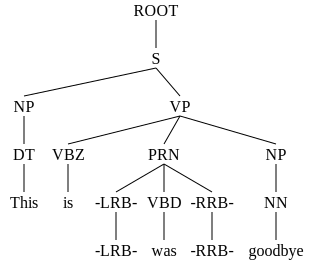

In [100]:
tree = get_sent_tree("This is (was) goodbye")
tree

In [102]:
import string

def get_num_punct(tree, punct_type=None):
    if punct_type is None:
        out = len([t for t in tree.subtrees() if t.label() in string.punctuation])
        return out + get_num_parens(tree)
    else:
        return len([t for t in tree.subtrees() if t.label() == punct_type])

def get_num_parens(tree, paren_set={'-LRB-', '-RRB-'}):
    return len([t for t in tree.subtrees() if t.label() in paren_set])

get_num_punct(tree)

2

In [105]:
def get_tree_stats(tree):
    d = {
        'num_words': get_num_words(tree),
        'height': tree.height(),
        'num_independent_clauses': get_num_independent_clauses(tree),
        'num_dependent_clauses': get_num_dependent_clauses(tree),
        'num_words_in_dependent_clauses': get_num_words_in_dependent_clauses(tree),
        'num_words_in_independent_clauses': get_num_words_in_independent_clauses(tree),
        'num_punct': get_num_punct(tree),
        'num_punct_colon': get_num_punct(tree, ':'),
        'num_punct_comma': get_num_punct(tree, ','),
        'num_parens': get_num_parens(tree),
    }
    return d

get_tree_stats(tree_wittgenstein)

{'num_words': 20,
 'height': 9,
 'num_independent_clauses': 2,
 'num_dependent_clauses': 0,
 'num_words_in_dependent_clauses': 0,
 'num_words_in_independent_clauses': 20,
 'num_punct': 2,
 'num_punct_colon': 1,
 'num_punct_comma': 0,
 'num_parens': 0}

In [106]:
get_tree_stats(tree_jameson)

{'num_words': 54,
 'height': 20,
 'num_independent_clauses': 1,
 'num_dependent_clauses': 1,
 'num_words_in_dependent_clauses': 36,
 'num_words_in_independent_clauses': 18,
 'num_punct': 5,
 'num_punct_colon': 0,
 'num_punct_comma': 4,
 'num_parens': 0}